In [1]:
# Import librarie

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#load the series

series = pd.read_csv('monthly champagne sales.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [3]:
# seperate out a validation dataset

split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)

Dataset 93, Validation 12


In [11]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# evaluate persistence model on time series
# prepare data

X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk_forward validation

history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %3f' % rmse)

>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2899.000, Expected=3370
>Predicted=3370.000, Expected=3740
>Predicted=3740.000, Expected=2927
>Predicted=2927.000, Expected=3986
>Predicted=3986.000, Expected=4217
>Predicted=4217.000, Expected=1738
>Predicted=173

### Summary Statistics

In [12]:
print(series.describe())

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64


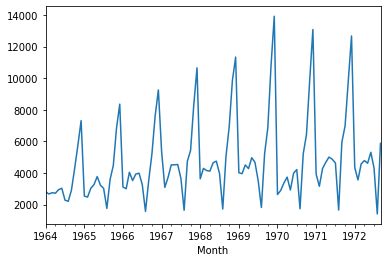

In [13]:
# line plot

series.plot()
plt.show()

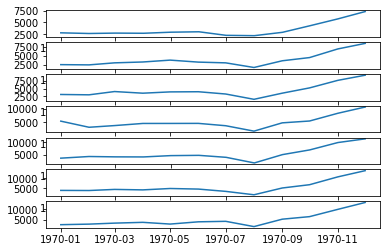

In [15]:
# seasonal line plots

groups = series['1964':'1970'].groupby(pd.Grouper(freq = 'A'))
year = pd.DataFrame()
plt.figure()

i = 1
n_groups = len(groups)
for name, group in groups:
    plt.subplot((n_groups * 100) + 10 + i)
    i += 1
    plt.plot(group)
plt.show()

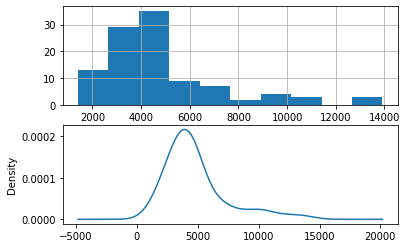

In [16]:
# density plot of the time series

plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()



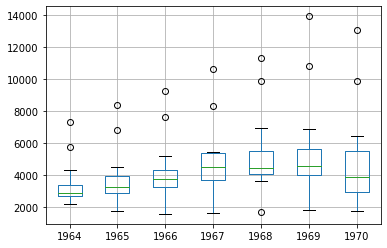

In [19]:
# Box and Whisker plots

groups = series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years =  pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()

### ARIMA Models

In [24]:
# manaual configured ARIMA
from statsmodels.tsa.stattools import adfuller

# create differenced series

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)
    
X = series.values
X = X.astype('float32')

# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]

# check if stationary
result = adfuller(stationay)
print('ADF Statistic:' % retult[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# save
stationary.to_csv('stationary.csv', header = False)

# plot
stationary.plot()
pyplot.show()

NameError: name 'stationay' is not defined